#### Imports

In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [28]:
import numpy as np
import os
import glob

In [43]:
import cv2
from matplotlib import pyplot as plt

#### Paths

In [3]:
PATH = "data/antispoofing/"

In [8]:
TEST_PATH = "data/antispoofing/test/"

In [27]:
TRN_REAL_PATH = os.path.join(PATH, 'train/real')
TRN_SPOOF_PATH = os.path.join(PATH, 'train/spoof')
VAL_REAL_PATH = os.path.join(PATH, 'valid/real')
VAL_SPOOF_PATH = os.path.join(PATH, 'valid/spoof')

#### Const

In [139]:
NEW_WIDTH = 480
NEW_HEIGHT = 480

#### Workflow 

##### Load data 

In [38]:
# load train
train_real_filelist  = glob.glob(os.path.join(TRN_REAL_PATH, '*.png'))
train_spoof_filelist = glob.glob(os.path.join(TRN_SPOOF_PATH, '*.png'))
train_labels = [0] * len(train_real_filelist) + [1] * len(train_spoof_filelist)

In [39]:
# load valid
val_real_filelist  = glob.glob(os.path.join(VAL_REAL_PATH, '*.png'))
val_spoof_filelist = glob.glob(os.path.join(VAL_SPOOF_PATH, '*.png'))
val_labels = [0] * len(val_real_filelist) + [1] * len(val_spoof_filelist)

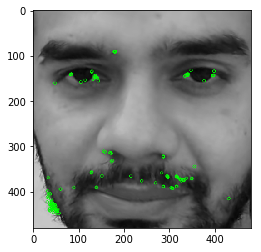

(<matplotlib.image.AxesImage at 0x115cf1e80>, None)

In [155]:
img = cv2.imread(train_real_filelist[800],0)

h, w = img.shape
dw, dh = w // 4, h // 4

img = cv2.resize(img[dh:h-dh, dw:w-dw], (NEW_WIDTH, NEW_HEIGHT))

height,width = img.shape
# Initiate STAR detector
orb = cv2.ORB.create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

img2 = np.zeros((height,width,3), np.uint8)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,img2,color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()

In [156]:
img.shape

(480, 480)

In [157]:
# shape of flatten description
des.flatten().shape

(4832,)

In [158]:
# responses from keypoints
len([k.response for k in kp])

151

All keyponts and descriptions are different sizes